In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [166]:
df=pd.read_csv("D:\\breast_cancer_csv.csv")

In [167]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [168]:
df.shape

(569, 31)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [170]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [171]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [172]:
def f(dd):
    if dd=="M":
        return 1
    if dd=="B":
        return 0

In [173]:
df["y"]=df["diagnosis"].apply(f)

In [174]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [175]:
def g(c):
    if c["diagnosis"]=="M":
        return 1
    else:
        return 0

In [176]:
df['yy']=df.apply(g,axis=1)

In [177]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y,yy
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1


In [178]:
df.drop("yy",axis=1,inplace=True)

In [179]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [180]:
df.drop("diagnosis",axis=1,inplace=True)

In [181]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [182]:
X=df.drop('y',axis=1)

In [183]:
y=df['y']

In [184]:
y.value_counts()

0    357
1    212
Name: y, dtype: int64

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [186]:
X_train.shape

(455, 30)

In [187]:
y_train.shape

(455,)

In [188]:
X_test.shape

(114, 30)

In [189]:
y_test.shape

(114,)

In [190]:
y_train.value_counts()

0    286
1    169
Name: y, dtype: int64

In [191]:
y_test.value_counts()

0    71
1    43
Name: y, dtype: int64

# logistic Regression

In [192]:
LR=LogisticRegression()

In [193]:
LR.fit(X_train,y_train)

C:\Users\Supriya Mandal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
y_scores=LR.predict(X_test)

In [195]:
from sklearn.metrics import accuracy_score,auc,f1_score,roc_auc_score,roc_curve

In [196]:
accuracy=accuracy_score(y_test,y_scores)
print("Logistic Regression Accuracy= ",accuracy)

Logistic Regression Accuracy=  0.956140350877193


In [197]:
a_LR=roc_auc_score(y_test,y_scores)  # AUC value

In [198]:
print("AUC of Logistic Regression=",a_LR)

AUC of Logistic Regression= 0.9464461185718964


In [199]:
fpr, tpr, thresholds=roc_curve(y_test,y_scores)

In [200]:
roc_auc_lr = auc(fpr, tpr)

In [201]:
thresholds

array([2, 1, 0], dtype=int64)

In [202]:
tpr

array([0.        , 0.90697674, 1.        ])

In [203]:
fpr

array([0.        , 0.01408451, 1.        ])

In [204]:
z=auc()

TypeError: auc() missing 2 required positional arguments: 'x' and 'y'

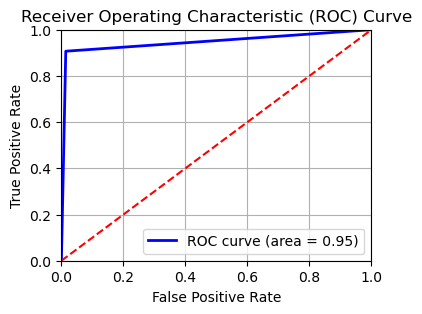

In [205]:
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for chance level
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Support Vector Machines

In [206]:
from sklearn.svm import SVC

In [207]:
svc=SVC()

In [208]:
svc.fit(X_train,y_train)

SVC()

In [209]:
y_svc=svc.predict(X_test)

In [210]:
fpr_svc, tpr_svc, thresholds_svc=roc_curve(y_test,y_svc)

In [211]:
auc_svc=roc_auc_score(y_test,y_svc)
print("AUC score of SVC= ",auc_svc)

AUC score of SVC=  0.9302325581395349


In [212]:
print("Accuracy of SVC= ",accuracy_score(y_test,y_svc))

Accuracy of SVC=  0.9473684210526315


In [213]:
roc_auc_svc = auc(fpr_svc, tpr_svc)

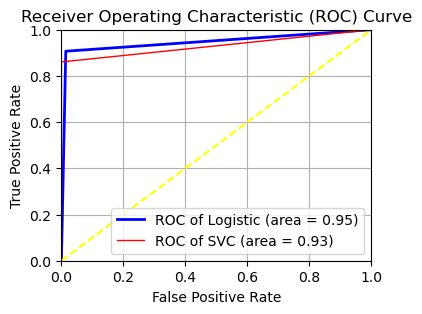

In [214]:
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC of Logistic (area = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_svc, tpr_svc, color='red', lw=1, label='ROC of SVC (area = {:.2f})'.format(roc_auc_svc)) 
plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')  # Diagonal line for chance level
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Random forest Classifier

In [215]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [216]:
rf=RandomForestClassifier()

In [217]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [218]:
y_rf=rf.predict(X_test)

In [219]:

print("Accuracy of Random Forest=",accuracy_score(y_test,y_rf))

Accuracy of Random Forest= 0.9649122807017544


In [220]:
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,y_rf)

In [221]:
thresholds_rf

array([2, 1, 0], dtype=int64)

In [222]:
auc_rf=roc_auc_score(y_test,y_rf)
print("AUC of Random Forest=",auc_rf)

AUC of Random Forest= 0.9580740255486406


In [223]:
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("AUC of Random Forest=",roc_auc_rf)

AUC of Random Forest= 0.9580740255486406


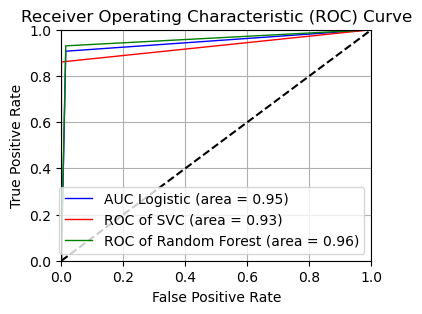

In [226]:
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='blue', lw=1, label='AUC Logistic (area = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_svc, tpr_svc, color='red', lw=1, label='ROC of SVC (area = {:.2f})'.format(roc_auc_svc)) 
plt.plot(fpr_rf, tpr_rf, color='green', lw=1, label='ROC of Random Forest (area = {:.2f})'.format(roc_auc_rf)) 
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for chance level
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Observations

In [241]:

M=["Logistic Regression","Support Vector Classifier","Random Forest Classifier"]
A=[accuracy_score(y_test,y_scores),accuracy_score(y_test,y_svc),accuracy_score(y_test,y_rf)]
AU=[np.round(roc_auc_lr,2),np.round(roc_auc_svc,2),np.round(roc_auc_rf,2)]
k={"Model Name":M,"AUC Score":AU,"Accuracy Score":A,}

In [242]:
perform=pd.DataFrame(k)

In [243]:
perform

,Model Name,AUC Score,Accuracy Score
0,Logistic Regression,0.95,0.956140
1,Support Vector Classifier,0.93,0.947368
2,Random Forest Classifier,0.96,0.964912


In [251]:
perform.sort_values(by=["AUC Score"],ascending=False)

,Model Name,AUC Score,Accuracy Score
2,Random Forest Classifier,0.96,0.964912
0,Logistic Regression,0.95,0.956140
1,Support Vector Classifier,0.93,0.947368


# Conclusion

As Random Forest Classifier has Highest AUC value among all three models so we can say that Random forest gives the best predictive classifier model and it has accuracy score of 96.5%